# <center>Time Series Analysis in TEDS Substance Abuse Dataset
    
    
## <center>Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import math

Using TensorFlow backend.


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# <font color='#186A3B'>Functions 

In [3]:
def plot_state(df,freq,st=None):
    if st is not None:
        ST = df[df['STATEFIP']==st]
        ST['ADMTDATE'] = pd.to_datetime(ST['ADMTDATE'])
        ST = ST.set_index('ADMTDATE')
        ST1 = ST.groupby(pd.Grouper(freq=freq)).agg('count')
        a4_dims = (48, 8.27)
        fig, ax = plt.subplots(figsize=a4_dims)
        ax = sns.lineplot(x=ST1.index,y=ST1['SERVICES_A'],markers=True)
        ax.set(xticks=ST1.index.values)
        return plt.show()
    else:
        df['ADMTDATE'] = pd.to_datetime(df['ADMTDATE'])
        df = df.set_index('ADMTDATE')
        df1 = df.groupby(pd.Grouper(freq=freq)).agg('count')
        a4_dims = (48, 8.27)
        fig, ax = plt.subplots(figsize=a4_dims)
        ax = sns.lineplot(x=df1.index,y=df1['SERVICES_A'],markers=True)
        ax.set(xticks=df1.index.values)
        #ax.xaxis.set_major_formatter(xx.DateFormatter("%d-%b-%Y"))
        return plt.show()

In [4]:
def check_stationarity(df,freq=None,st=None):
    if st is not None:
        ST = df[df['STATEFIP']==st]
        ST['ADMTDATE'] = pd.to_datetime(ST['ADMTDATE'])
        ST = ST.set_index('ADMTDATE')
        ST1 = ST.groupby(pd.Grouper(freq=freq)).agg('count')
        X = ST1['SERVICES_A']
        rolmean = X.rolling(window=12).mean()
        rolstd = X.rolling(window=12).std()
        orig = plt.plot(X,color='blue',label='Original')
        mean = plt.plot(rolmean,color='red',label='Rolling Mean')
        std = plt.plot(rolstd,color='black',label= 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
        return plt.show(block=False)
    elif st is None:
        df['ADMTDATE'] = pd.to_datetime(df['ADMTDATE'])
        df = df.set_index('ADMTDATE')
        df1 = df.groupby(pd.Grouper(freq=freq)).agg('count')
        X = df1['SERVICES_A']
        rolmean = X.rolling(window=12).mean()
        rolstd = X.rolling(window=12).std()
        orig = plt.plot(X,color='blue',label='Original')
        mean = plt.plot(rolmean,color='red',label='Rolling Mean')
        std = plt.plot(rolstd,color='black',label= 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
        return plt.show(block=False)

In [5]:
def indexeddf(df,freq=None,st=None,agg=None):
    if st is not None:
        ST = df[df['STATEFIP']==st]
        ST['ADMTDATE'] = pd.to_datetime(ST['ADMTDATE'])
        ST = ST.set_index('ADMTDATE')
        ST1 = ST.groupby(pd.Grouper(freq=freq)).agg(agg)
        return ST1
    elif st is None:
        df['ADMTDATE'] = pd.to_datetime(df['ADMTDATE'])
        df = df.set_index('ADMTDATE')
        df1 = df.groupby(pd.Grouper(freq=freq)).agg(agg)
        return df1

In [6]:
def fullertest(df):
    x = []
    dftest = adfuller(df['SERVICES_A'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    if dfoutput['Critical Value (1%)']> dfoutput['Test Statistic'] and dfoutput['p-value']<.05:
        x.append('Reject null hypothesis, data is stationary')
    else:
        x.append('Do not reject null hypothesis, data is not stationary')
    return dfoutput,x

# <font color='#186A3B'>Loading the Data.........

In [3]:
df18 = pd.read_csv('C:\\Users\\Reveal GC\\Desktop\\Hybrid\\tedsa_hybrid_2018.csv',usecols=['SERVICES_A','PSOURCE_A','SEX_A','RACE_A',\
                                                                                          'ETHNIC_A','EDUC_A','EMPLOY_A','PRIMINC_A','HLTHINS_A',\
                                                                                          'PRIMPAY_A','DETCRIM_A','MARSTAT_A','DAYWAIT_A','SUB1_A',\
                                                                                          'AGE_O','ADMTDATE','STATEFIP'])

In [4]:
df17 = pd.read_csv('C:\\Users\\Reveal GC\\Desktop\\Hybrid\\tedsa_hybrid_2017.csv',usecols=['SERVICES_A','PSOURCE_A','SEX_A','RACE_A',\
                                                                                          'ETHNIC_A','EDUC_A','EMPLOY_A','PRIMINC_A','HLTHINS_A',\
                                                                                          'PRIMPAY_A','DETCRIM_A','MARSTAT_A','DAYWAIT_A','SUB1_A',\
                                                                                          'AGE_O','ADMTDATE','STATEFIP'])

In [5]:
df16 = pd.read_csv('C:\\Users\\Reveal GC\\Desktop\\Hybrid\\tedsa_hybrid_2016.csv',usecols=['SERVICES_A','PSOURCE_A','SEX_A','RACE_A',\
                                                                                          'ETHNIC_A','EDUC_A','EMPLOY_A','PRIMINC_A','HLTHINS_A',\
                                                                                          'PRIMPAY_A','DETCRIM_A','MARSTAT_A','DAYWAIT_A','SUB1_A',\
                                                                                          'AGE_O','ADMTDATE','STATEFIP'])

In [6]:
df15 = pd.read_csv('C:\\Users\\Reveal GC\\Desktop\\Hybrid\\tedsa_hybrid_2015.csv',usecols=['SERVICES_A','PSOURCE_A','SEX_A','RACE_A',\
                                                                                          'ETHNIC_A','EDUC_A','EMPLOY_A','PRIMINC_A','HLTHINS_A',\
                                                                                          'PRIMPAY_A','DETCRIM_A','MARSTAT_A','DAYWAIT_A','SUB1_A',\
                                                                                          'AGE_O','ADMTDATE','STATEFIP'])

# <font color='#186A3B'>Check Length of all Dataframes before Joining

In [11]:
print('{} should be the length of the combined dataframes'.format(len(df18)+len(df17)+len(df16)+len(df15)))

7313846 should be the length of the combined dataframes


## <font color='#186A3B'>Joining the Data

In [7]:
df = df18.append(df17)
df = df.append(df16)
df = df.append(df15)

In [9]:
del(df18)
del(df17)
del(df16)
del(df15)

In [ ]:
# print('when actually combined, the length of the dataframe is {}'.format(len(df)))

In [8]:
df.isnull().sum()

SERVICES_A          0
PSOURCE_A      312538
SEX_A            4833
RACE_A         203552
ETHNIC_A       224398
EDUC_A         567756
EMPLOY_A       530822
PRIMINC_A     2891318
HLTHINS_A     4105039
PRIMPAY_A     4382912
DETCRIM_A     5917134
MARSTAT_A     1603065
DAYWAIT_A     3205355
SUB1_A         220419
ADMTDATE            0
AGE_O               0
STATEFIP            0
dtype: int64

In [130]:
df.head()

,SERVICES_A,PSOURCE_A,SEX_A,RACE_A,ETHNIC_A,EDUC_A,EMPLOY_A,PRIMINC_A,HLTHINS_A,PRIMPAY_A,DETCRIM_A,MARSTAT_A,DAYWAIT_A,SUB1_A,ADMTDATE,AGE_O,STATEFIP
0,7.0,1.0,2.0,1.0,5.0,4.0,2.0,1.0,20.0,9.0,NaN,1.0,0.0,2.0,2018-10-30,24.0,AK
1,7.0,1.0,2.0,21.0,5.0,3.0,1.0,1.0,4.0,4.0,NaN,4.0,0.0,2.0,2018-05-04,32.0,AK
2,7.0,1.0,2.0,1.0,5.0,3.0,1.0,1.0,20.0,9.0,NaN,1.0,0.0,2.0,2018-10-26,26.0,AK
3,7.0,1.0,2.0,21.0,5.0,2.0,4.0,20.0,4.0,4.0,NaN,1.0,0.0,2.0,2018-12-11,14.0,AK
4,7.0,1.0,2.0,21.0,5.0,3.0,4.0,20.0,20.0,9.0,NaN,3.0,0.0,2.0,2018-08-24,62.0,AK


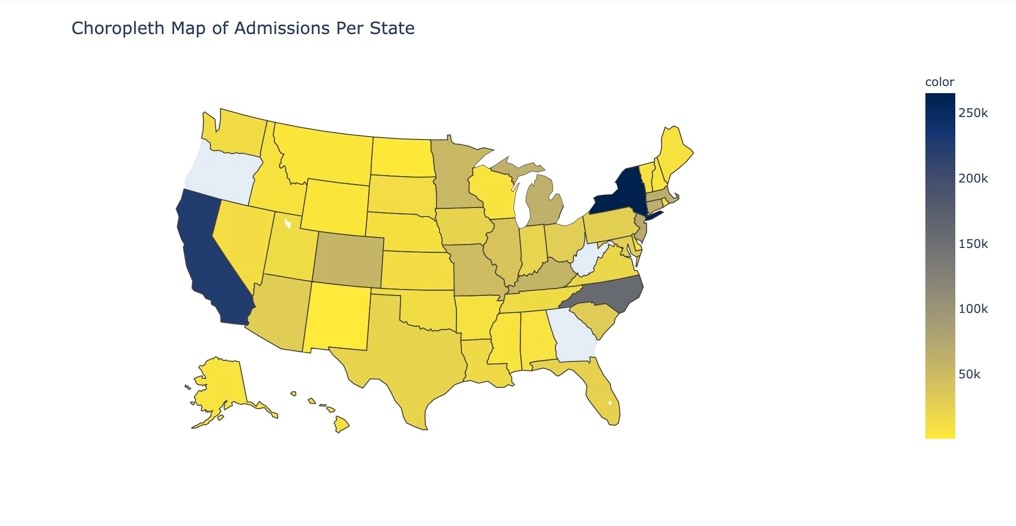

In [6]:
from IPython.display import Image
Image(filename='C:\\Users\\Reveal GC\\Downloads\\cmapteds.jpeg')

# <font color='#186A3B'> Plotting data from a few different states to compare

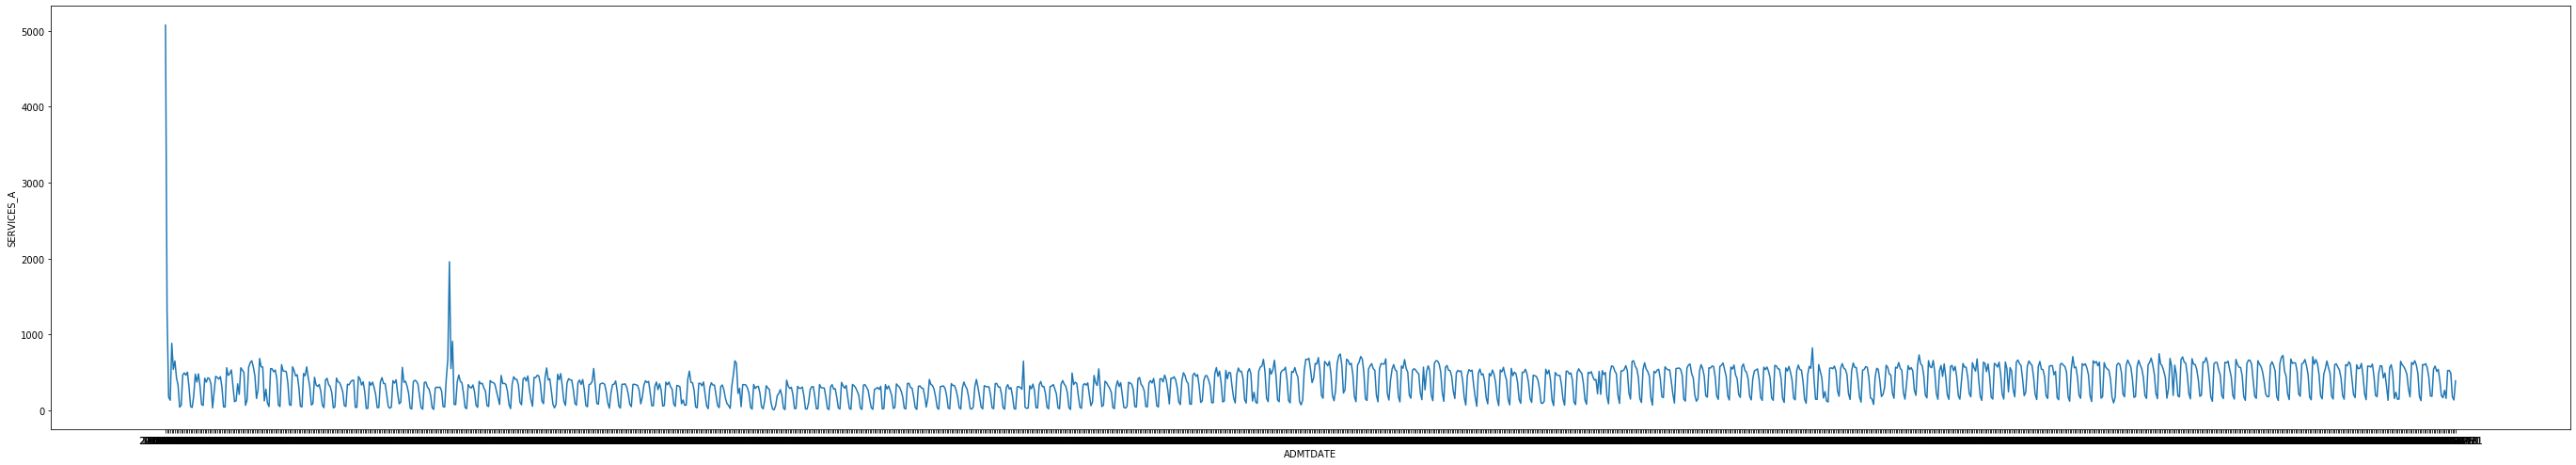

In [16]:
import warnings
warnings.filterwarnings('ignore')
plot_state(df,freq='D',st='MD')

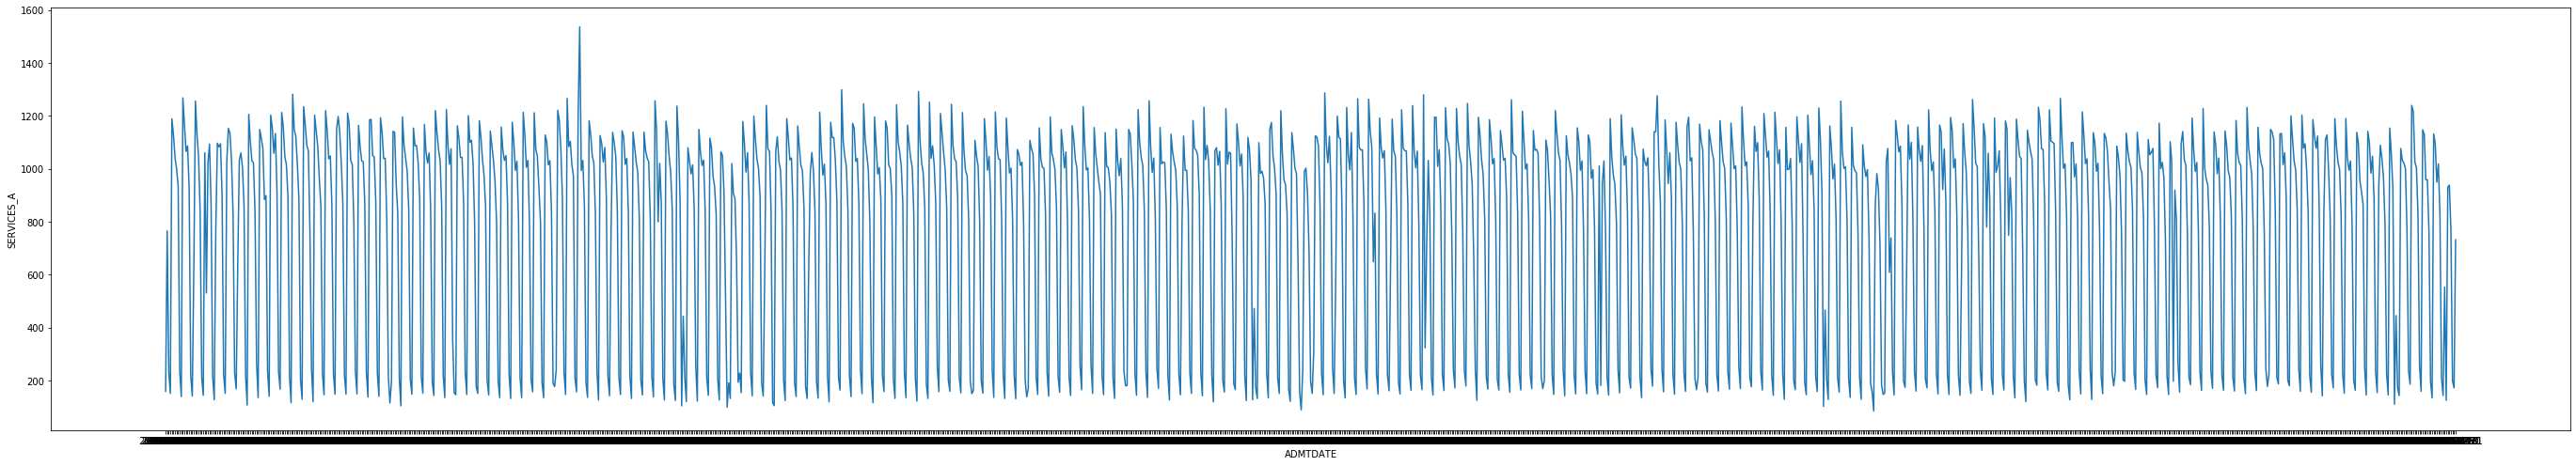

In [17]:
plot_state(df,freq='D',st='NY')

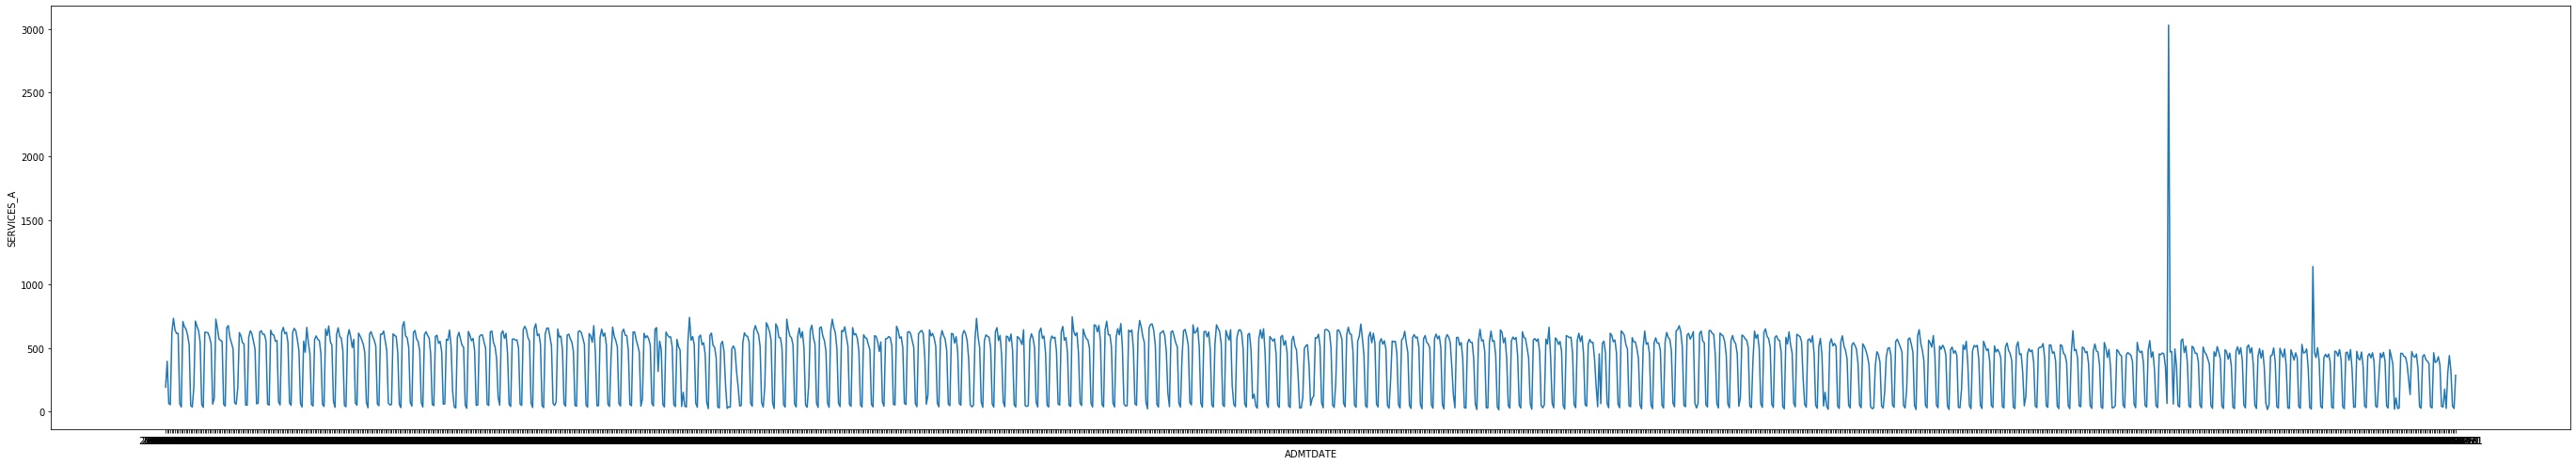

In [18]:
plot_state(df,freq='D',st='CA')

### <font color='#EC7063'>Originally, I was going to to do a time series analysis using months,
### <font color='#EC7063'> but when the data is aggregated at that level, a lot of detail is lost.  So, this project will forecast using data aggregated by the day.

# <font color='#186A3B'> Testing for Stationarity

### <font color='#2980B9'> A Series must be stationary before any forecasting can be perfromed.  Stationarity refers to data that is not increasing over time.
     There are a couple different methods to check for stationarity.  The first, is the eye test, and the second method is a statistical test called the Augmented Dickey-Fuller Test.

## <font color='#186A3B'>Checking Stationarity by looking at the rolling mean and rolling standard deviation.

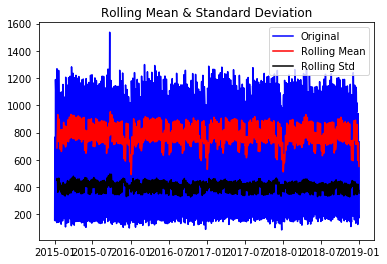

In [19]:
check_stationarity(df,freq='D',st='NY')

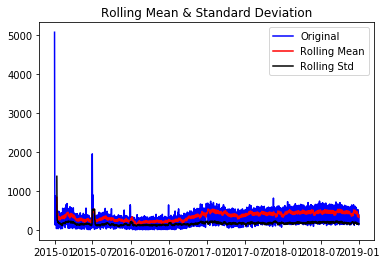

In [20]:
check_stationarity(df,freq='D',st='MD')

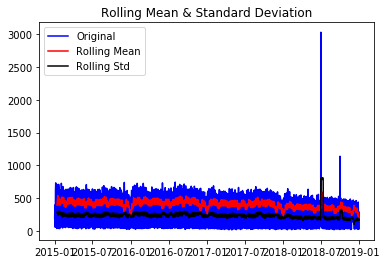

In [21]:
check_stationarity(df,freq='D',st='CA')

### A time series has four components, three of which are considered systematic, in that they have consistency and can be described and modeled.  The fourth component, noise, is non-systematic. Determining whether a series is additive or multiplicative is important in a time-series analysis.  Below, we can determine that this time-series is additive because the frequency does not increase or decrease over time.

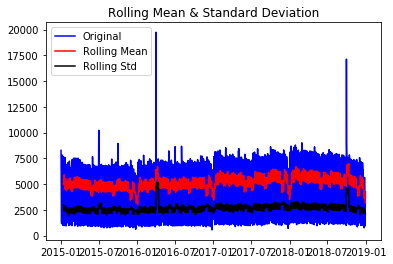

In [22]:
#Check all data
check_stationarity(df,freq='D')

# <font color='#186A3B'>Indexing dataframes by Day

In [24]:
ny = indexeddf(df,freq='D',st='NY',agg='count')

In [25]:
md = indexeddf(df,freq='D',st='MD',agg='count')

In [26]:
ca = indexeddf(df,freq='D',st='CA',agg='count')

In [27]:
df1 = indexeddf(df,freq='D',agg='count')

# <font color='#186A3B'> Augmented Dickey-Fuller Test
    
    
## Interpreting the Results

### Critical values should be greater than the test statistic 
### and P-value should be <.05.

### <font color='red'>*** Null hypothesis is that the data is not stationary 
### <font color='red'>***Alternative hypothesis is that the data is stationary

In [28]:
fullertest(ny)

(Test Statistic                -7.043716e+00
 p-value                        5.758485e-10
 #Lags Used                     2.000000e+01
 Number of Observations Used    1.440000e+03
 Critical Value (1%)           -3.434899e+00
 Critical Value (5%)           -2.863549e+00
 Critical Value (10%)          -2.567840e+00
 dtype: float64, ['Reject null hypothesis, data is stationary'])

In [29]:
fullertest(ca)

(Test Statistic                   -3.884971
 p-value                           0.002148
 #Lags Used                       20.000000
 Number of Observations Used    1440.000000
 Critical Value (1%)              -3.434899
 Critical Value (5%)              -2.863549
 Critical Value (10%)             -2.567840
 dtype: float64, ['Reject null hypothesis, data is stationary'])

In [30]:
fullertest(md)

(Test Statistic                   -2.120803
 p-value                           0.236232
 #Lags Used                       22.000000
 Number of Observations Used    1438.000000
 Critical Value (1%)              -3.434906
 Critical Value (5%)              -2.863552
 Critical Value (10%)             -2.567841
 dtype: float64, ['Do not reject null hypothesis, data is not stationary'])

In [31]:
fullertest(df1)

(Test Statistic                   -4.355264
 p-value                           0.000356
 #Lags Used                       21.000000
 Number of Observations Used    1439.000000
 Critical Value (1%)              -3.434902
 Critical Value (5%)              -2.863551
 Critical Value (10%)             -2.567840
 dtype: float64, ['Reject null hypothesis, data is stationary'])

# Since this data is stationary, no transformations to make data stationary are needed.

In [32]:
indexedDataset_logScale = np.log(df1['SERVICES_A'])

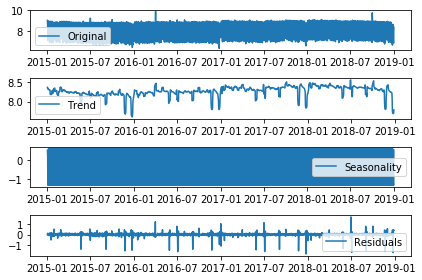

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()



# Autoregressive Modeling

In [34]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [49]:
X = df1['SERVICES_A'].values

In [50]:
train = X[0:1095]

In [51]:
test = X[1095:]

In [52]:
predicitons = []

In [53]:
model_ar = AR(train)

In [54]:
model_ar_fit = model_ar.fit()

In [55]:
predictions = model_ar_fit.predict(start=1095,end=1460)

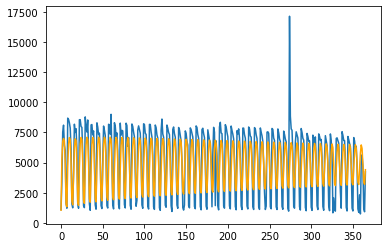

In [56]:
plt.plot(test)
plt.plot(predictions,color='orange')

In [57]:
mse = mean_squared_error(test,predictions)

In [58]:
mse

3334836.4348149416

In [59]:
math.sqrt(mse)

1826.1534532494638

# ARIMA Model

In [60]:
from statsmodels.tsa.arima_model import ARIMA

In [61]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))

In [62]:
import warnings
warnings.filterwarnings('ignore')
results = {}
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        results[param] = param
        results[param] = model_arima_fit.aic
    except:
        continue

In [63]:
min_val = min(results.keys(),key=(lambda k: results[k]))

In [64]:
model_arima = ARIMA(train,order=(min_val))
model_arima_fit = model_arima.fit()

In [65]:
predictions = model_arima_fit.forecast(steps=366)[0]
predictions

array([1410.18582287, 4819.74395693, 7285.02976731, 7551.03540255,
       6061.87271304, 3410.14107797, 1435.78568114, 1948.37399898,
       4531.42669708, 7080.5555816 , 7742.61033572, 6076.45348222,
       3281.06488871, 1448.3390951 , 1988.92518668, 4489.30849531,
       7049.99054667, 7748.80123481, 6063.63437474, 3256.79338958,
       1439.81281626, 1982.51156703, 4473.83718469, 7034.69155158,
       7736.12279993, 6049.28339504, 3242.76813701, 1428.6343067 ,
       1971.70416667, 4461.20832616, 7020.70276676, 7721.53894837,
       6034.89821302, 3229.73805852, 1417.1391602 , 1960.48891934,
       4448.87842517, 7006.82322287, 7706.76477283, 6020.52195445,
       3216.80422875, 1405.60713258, 1949.23539753, 4436.57906002,
       6992.95251653, 7691.97242324, 6006.14856058, 3203.87990841,
       1394.0704881 , 1937.97749198, 4424.28220785, 6979.08258591,
       7677.17905875, 5991.77642346, 3190.95678832, 1382.53284709,
       1926.71827163, 4411.98497146, 6965.21282232, 7662.38637

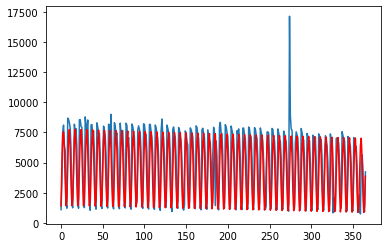

In [66]:
plt.plot(test)
plt.plot(predictions,color='red')

In [67]:
mse = mean_squared_error(test,predictions)

In [68]:
math.sqrt(mse)

1962.41361619006

# <center>LSTM Neural Network

## ARIMA is a traditional method for forecasting that has some limitations.  ARIMA only considers one variable, the serires.  However, there are other valuable data points within a dataset that maybe able to better predict future admissions.  To get better, more accurate forecasting, I will apply a Long Short-Term Memory neural network architecture to the data.

In [69]:
df_dummies = pd.read_csv('C:\\Users\\Reveal GC\\Desktop\\df_dummies.csv')

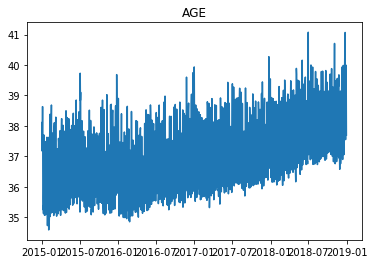

In [110]:
dfage = indexeddf(df,freq='D',agg='mean')
ax = plt.plot(dfage['AGE_O'])
plt.title('AGE')
plt.show()

## Mean age is increasing over time

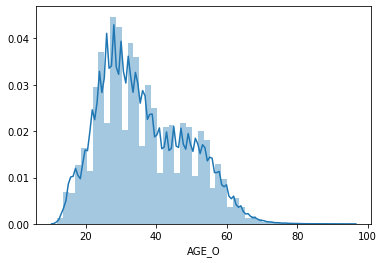

In [109]:
sns.distplot(df['AGE_O'])
plt.show()

In [72]:
values = [x for x in df_dummies.columns if 'SUB' in x]

In [73]:
values

['SUB1_A_1.0',
 'SUB1_A_10.0',
 'SUB1_A_11.0',
 'SUB1_A_12.0',
 'SUB1_A_13.0',
 'SUB1_A_14.0',
 'SUB1_A_15.0',
 'SUB1_A_16.0',
 'SUB1_A_17.0',
 'SUB1_A_18.0',
 'SUB1_A_2.0',
 'SUB1_A_20.0',
 'SUB1_A_3.0',
 'SUB1_A_4.0',
 'SUB1_A_5.0',
 'SUB1_A_6.0',
 'SUB1_A_7.0',
 'SUB1_A_8.0',
 'SUB1_A_9.0',
 'SUB1_A_nan']

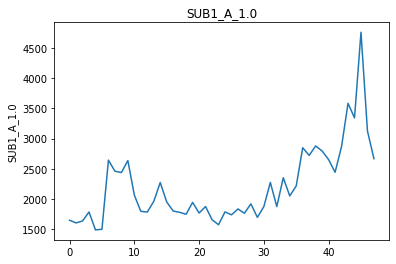

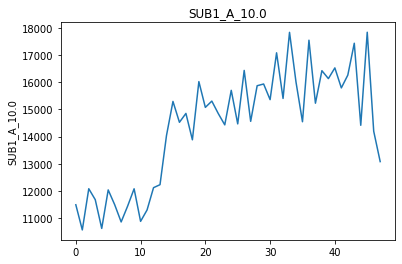

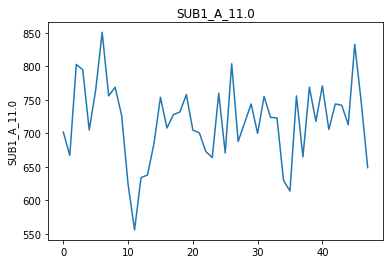

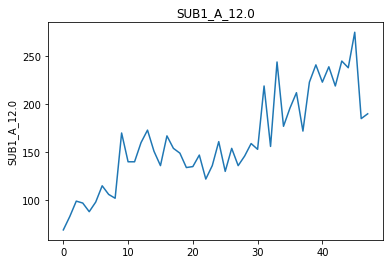

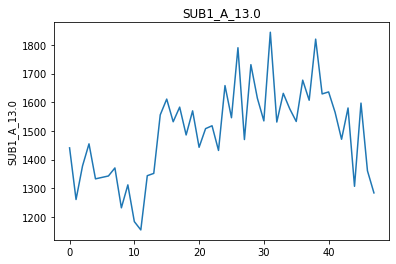

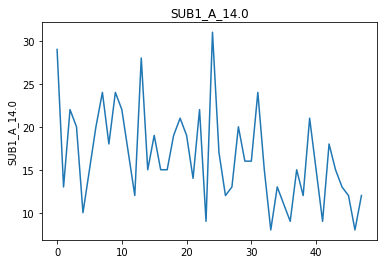

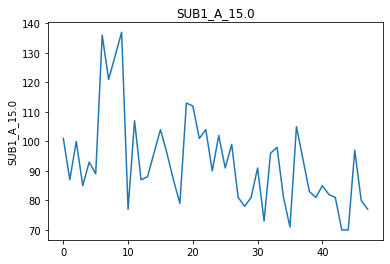

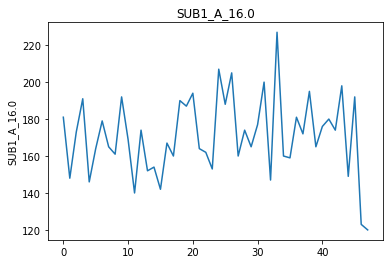

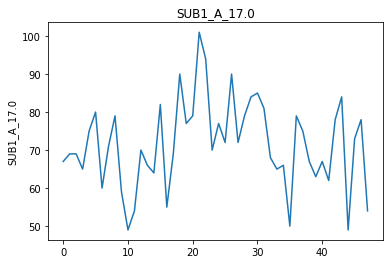

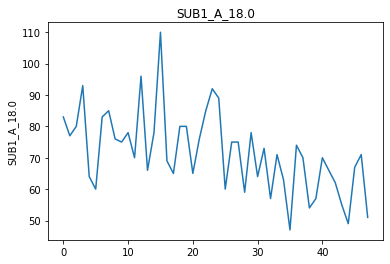

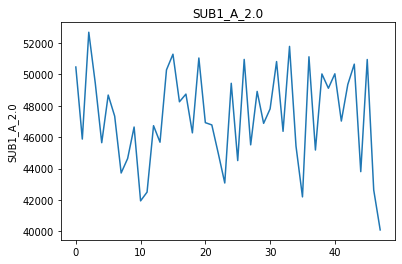

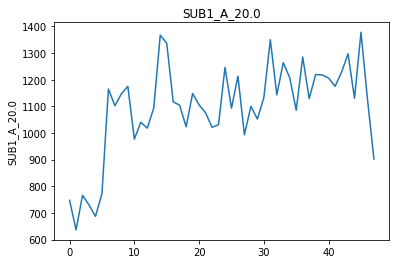

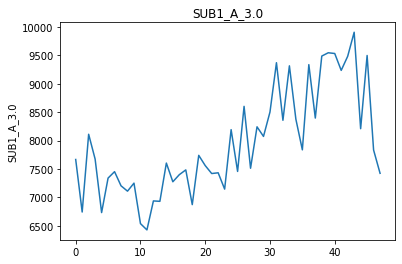

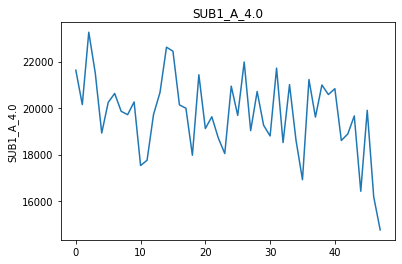

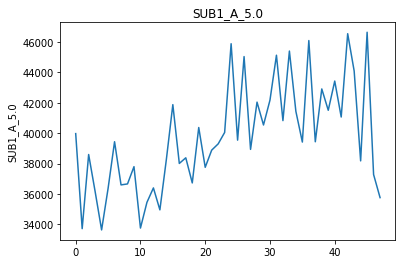

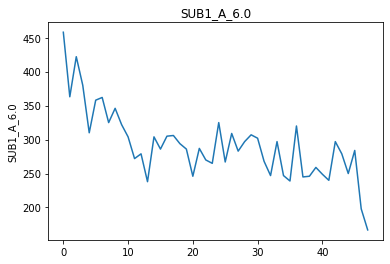

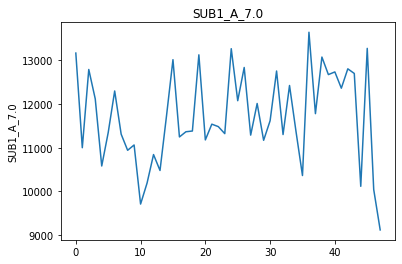

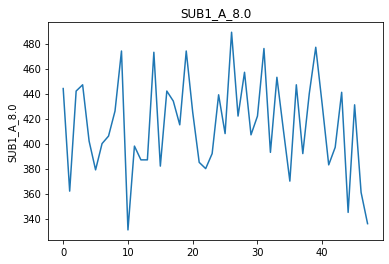

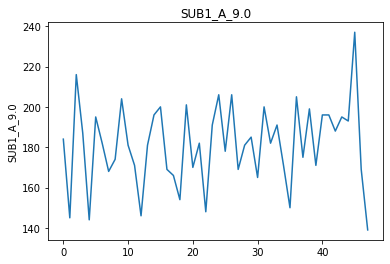

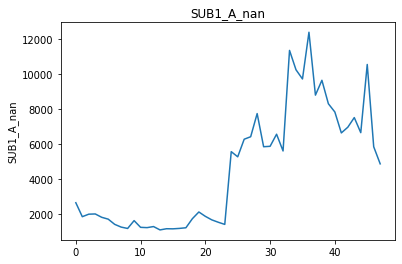

In [74]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('C:\\Users\\Reveal GC\\Desktop\\output.pdf') as pdf:
    for i in values:
        plt.figure()
        fig= sns.lineplot(x=df_dummies.index, y=df_dummies[i]).set_title(i).get_figure()
        pdf.savefig(fig)

In [75]:
# A function to create datafile for deep learning

def create_data(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [80]:
final_df = pd.DataFrame(df1['SERVICES_A'])

In [81]:
final_df.head()

,SERVICES_A
ADMTDATE,
2015-01-01,8270
2015-01-02,5276
2015-01-03,1330
2015-01-04,1143
2015-01-05,7833


In [82]:
np.random.seed(7)

In [84]:
dataframe = pd.DataFrame(final_df['SERVICES_A'])
data = dataframe.values
data = data.astype('float32')

In [85]:
# standardize data
scaler = MinMaxScaler(feature_range=(0, 1))
final_data = scaler.fit_transform(data)

In [87]:
# Creating training and testing datasets for deep learning
train_size = int(len(final_data) * 0.75)
test_size = len(final_data) - train_size
train, test = final_data[0:train_size,:], final_data[train_size:len(final_data),:]

In [88]:
# reshape data
look_back = 3
X_train, y_train = create_data(train, look_back)
X_test, y_test = create_data(test, look_back)

In [89]:
# reshape inputs
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [90]:
# Build architecture and fit model


batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(200):
    model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()

Epoch 1/1
 - 2s - loss: 0.0171
Epoch 1/1
 - 2s - loss: 0.0132
Epoch 1/1
 - 1s - loss: 0.0116
Epoch 1/1
 - 2s - loss: 0.0105
Epoch 1/1
 - 1s - loss: 0.0098
Epoch 1/1
 - 1s - loss: 0.0092
Epoch 1/1
 - 2s - loss: 0.0088
Epoch 1/1
 - 1s - loss: 0.0084
Epoch 1/1
 - 1s - loss: 0.0080
Epoch 1/1
 - 2s - loss: 0.0075
Epoch 1/1
 - 2s - loss: 0.0068
Epoch 1/1
 - 2s - loss: 0.0061
Epoch 1/1
 - 2s - loss: 0.0052
Epoch 1/1
 - 2s - loss: 0.0045
Epoch 1/1
 - 2s - loss: 0.0041
Epoch 1/1
 - 2s - loss: 0.0040
Epoch 1/1
 - 2s - loss: 0.0040
Epoch 1/1
 - 2s - loss: 0.0040
Epoch 1/1
 - 2s - loss: 0.0040
Epoch 1/1
 - 2s - loss: 0.0039
Epoch 1/1
 - 2s - loss: 0.0039
Epoch 1/1
 - 2s - loss: 0.0039
Epoch 1/1
 - 2s - loss: 0.0039
Epoch 1/1
 - 2s - loss: 0.0039
Epoch 1/1
 - 2s - loss: 0.0039
Epoch 1/1
 - 2s - loss: 0.0039
Epoch 1/1
 - 2s - loss: 0.0039
Epoch 1/1
 - 2s - loss: 0.0039
Epoch 1/1
 - 2s - loss: 0.0039
Epoch 1/1
 - 2s - loss: 0.0039
Epoch 1/1
 - 2s - loss: 0.0038
Epoch 1/1
 - 2s - loss: 0.0038
Epoch 1/

In [97]:
# predict
trainPredict = model.predict(X_train, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(X_test, batch_size=batch_size)

In [99]:
# change the data back to original format
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])

In [102]:
#RMSE Calculation
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: {} RMSE'.format(trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: {} RMSE'.format(testScore))

Train Score: 108774269.73017924 RMSE
Test Score: 1212.3272762621782 RMSE


In [103]:
trainPredictPlot = np.empty_like(final_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [105]:
testPredictPlot = np.empty_like(final_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(final_data)-1, :] = testPredict

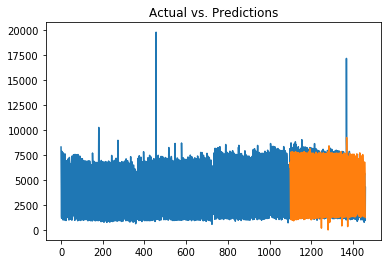

In [108]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(final_data))


#plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('Actual vs. Predictions')
plt.show()

# Results

<font color='#8E44AD'>AR model : RMSE = 1826.15

<font color='#8E44AD'> ARIMA model : RMSE = 1962.41

<font color='#8E44AD'> LSTM w/ Memory Between Batches: RMSE = 1212.33


# <font color='black'>Whats Next?

## <font color='black'>Multivariate Time Series incorporating mean age and  Stacked LSTMs with Memory Between Batches.

References: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/